## Drug Consumptions (UCI)

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import display

df = pd.read_csv("Drug_Consumption.csv")

df.drop(columns=["ID"], inplace=True)

display(df)


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


### Categorical data before preprocessing

In [2]:

import matplotlib.pyplot as plt

def plot_categorical_distribution(df, column, ax, label_map=None, sort_numerically=False, title=None):

    values = df[column].dropna()

    counts = values.value_counts()
    percents = counts / counts.sum() * 100

    sorted_counts = counts.sort_values(ascending=False)
    sorted_percents = percents[sorted_counts.index]
    counts = sorted_counts
    percents = sorted_percents

    if label_map:
        display_labels = counts.index.map(lambda x: label_map.get(x, x))
    else:
        display_labels = counts.index

    bars = ax.barh(display_labels, counts.values, color='skyblue', edgecolor='black')

    for bar, percent in zip(bars, percents):
        ax.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2,
                    f'{percent:.1f}%', ha='left', va='center', fontsize=9)

    ax.set_title(title or f'Distribution of {column}')
    ax.set_ylabel(column)
    ax.set_xlabel('Count')
    ax.set_xlim(0, counts.max() * 1.2)
    ax.grid(axis='x', linestyle='--', alpha=0.5)


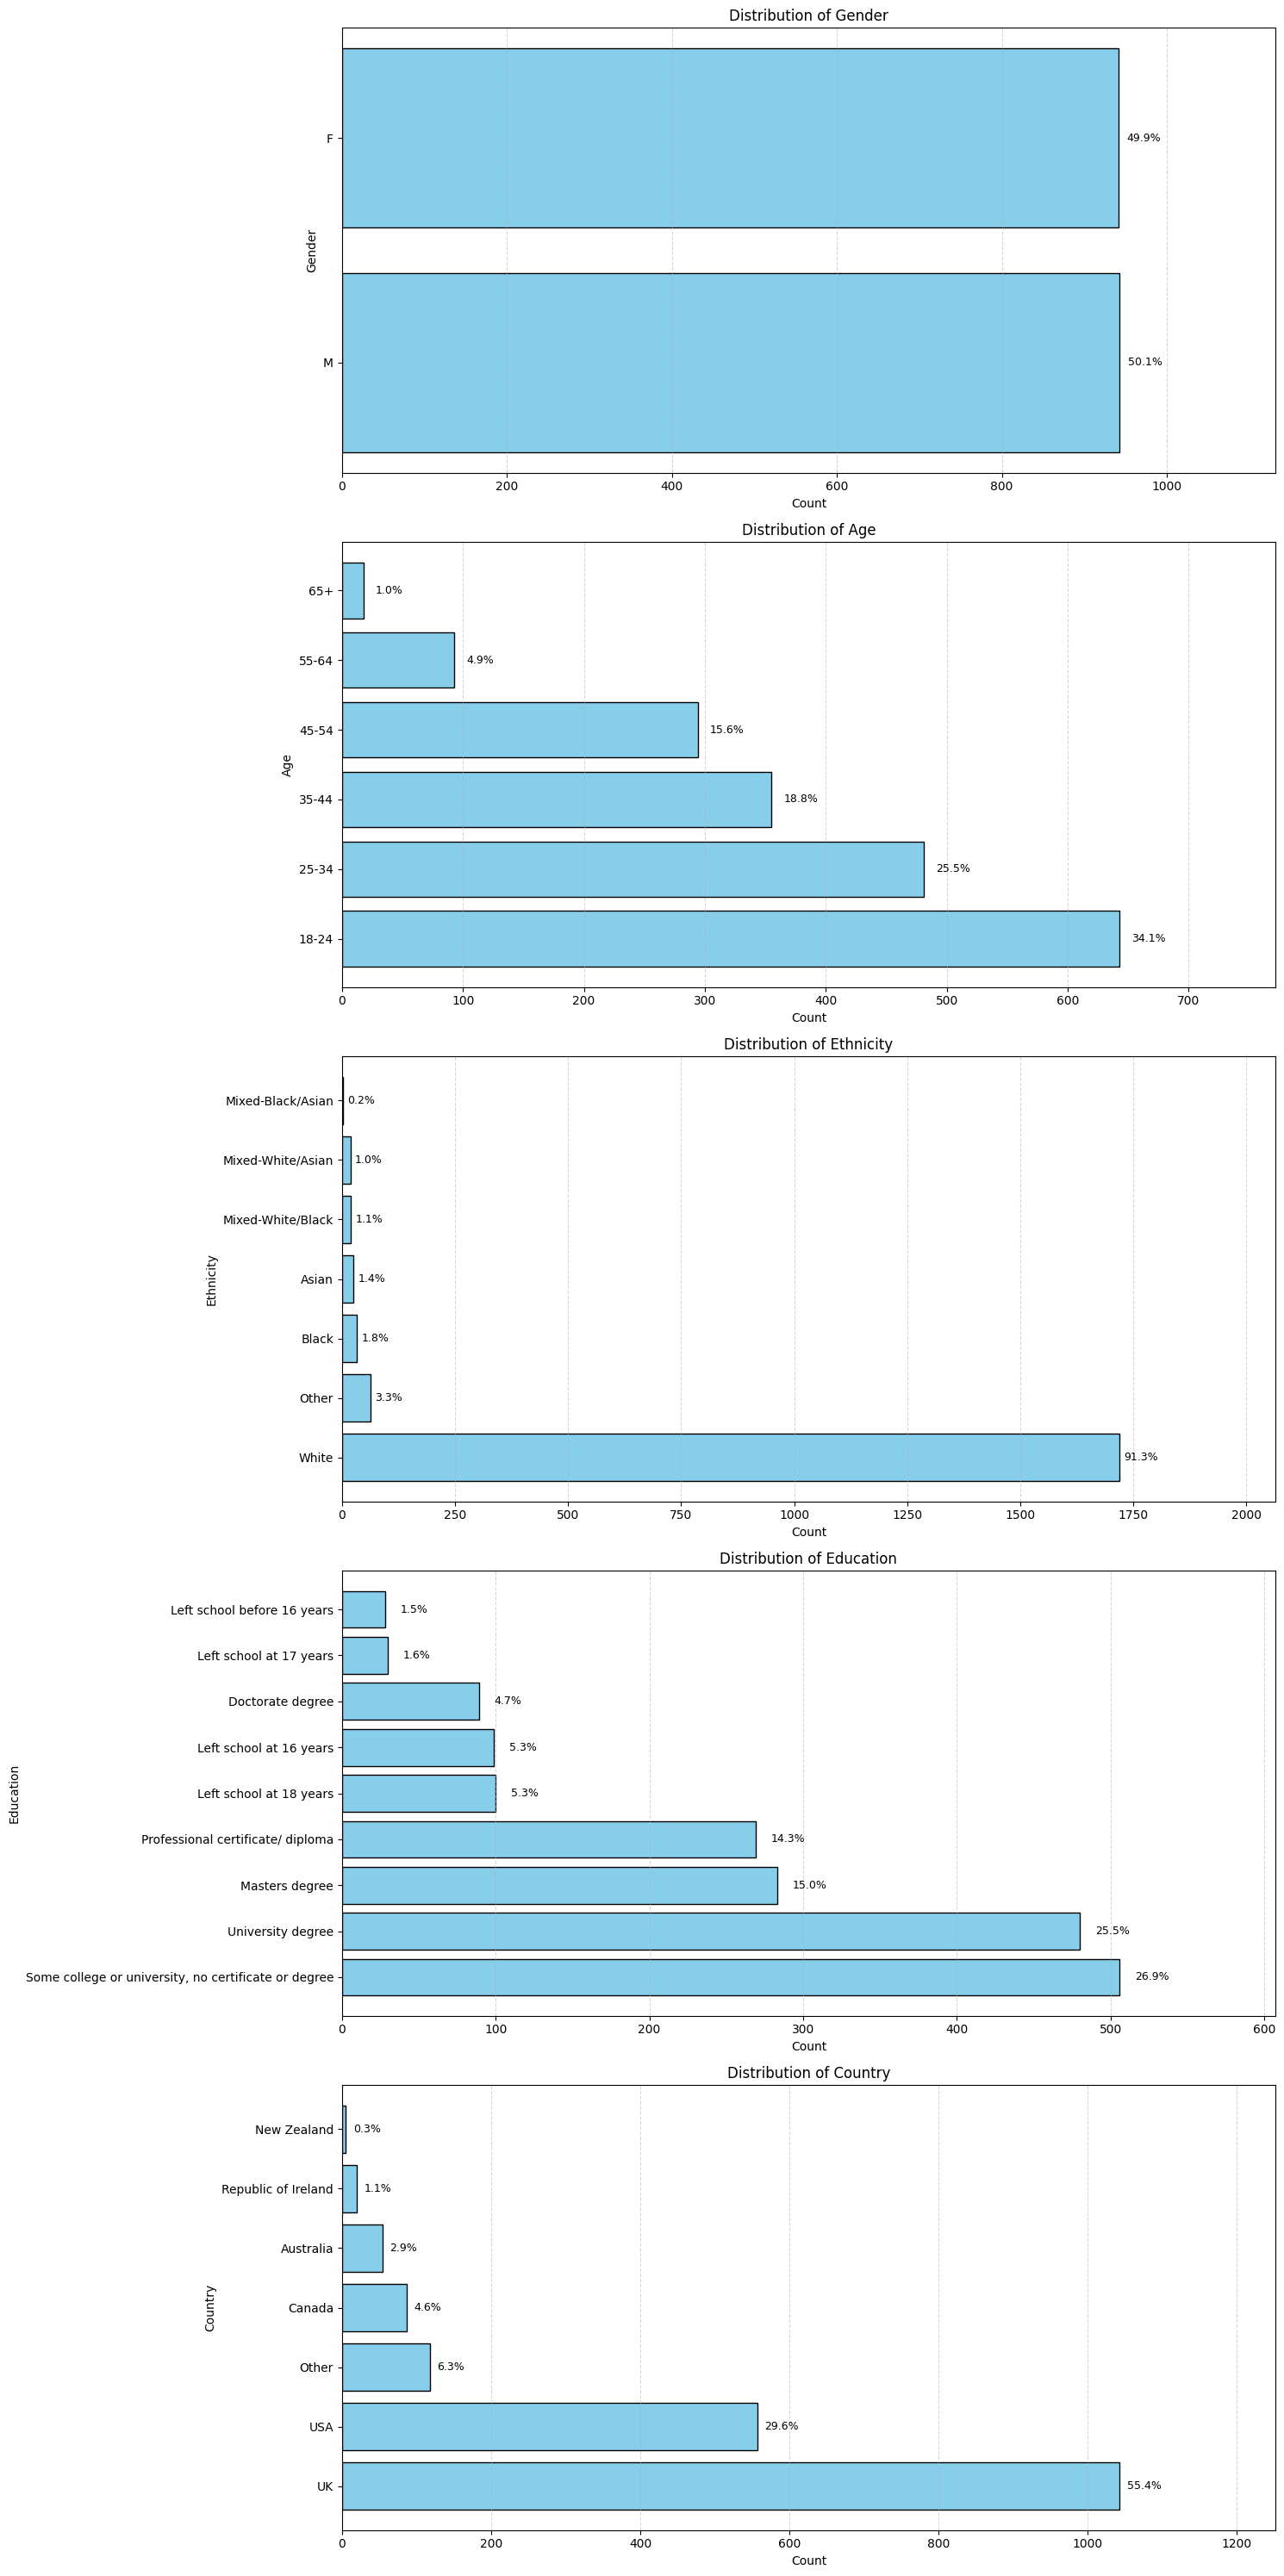

In [3]:
fig, axes = plt.subplots(5, 1, figsize=(15, 30))

columns = ['Gender', 'Age', 'Ethnicity', 'Education', 'Country']

for ax, col in zip(axes, columns):
    plot_categorical_distribution(df, col, ax=ax)

plt.tight_layout()
plt.show()


In [4]:
df.loc[df['Education'].str.contains('left school', case=False), 'Education'] = 'left school before 19 years'

age_mapping = {
    '18-24' : 1,
    '25-34' : 2,
    '35-44' : 3,
    '45-54' : 4,
    '55-64' : 5,
    '65+' : 6
}

gender_mapping = {
    'M' : 0,
    'F' : 1
}

df['Age'] = df['Age'].map(age_mapping)
df['Gender'] = df['Gender'].map(gender_mapping)

df = pd.get_dummies(df, columns=['Education', 'Ethnicity', 'Country'], drop_first=True)

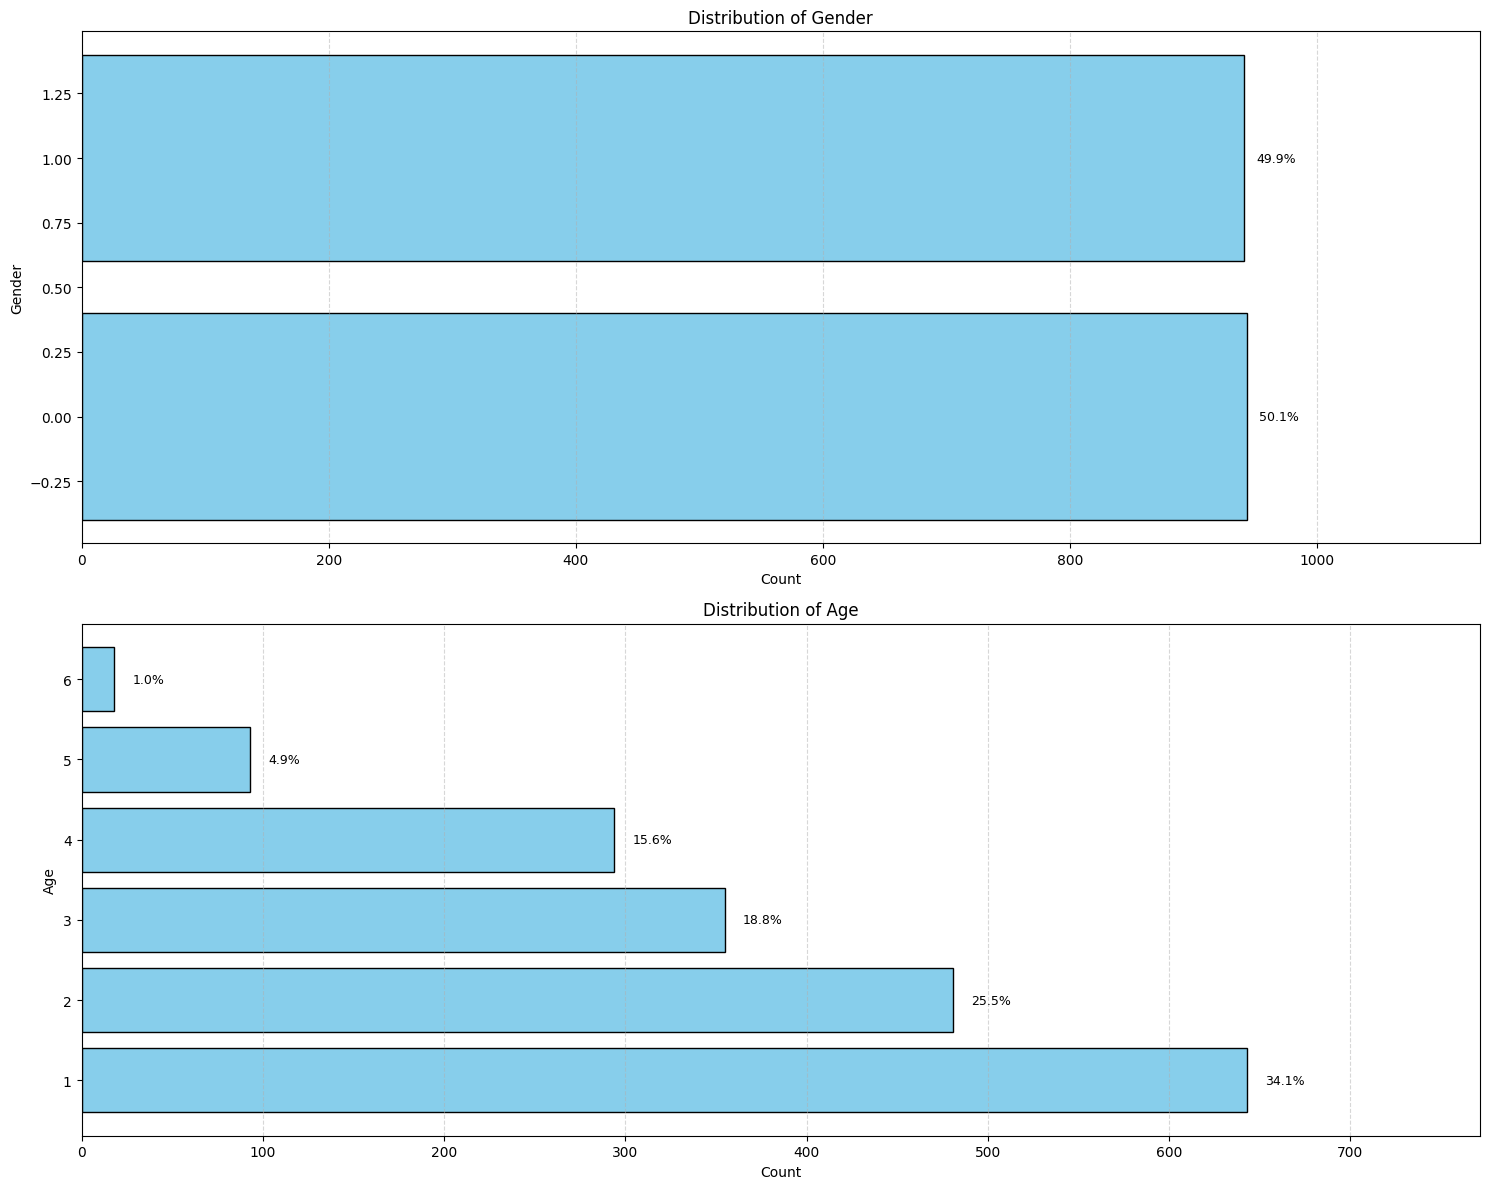

,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,True,False,False,False,False,False
...,...,...,...,...,...,...
1879,False,False,False,False,False,True
1880,False,False,False,False,False,True
1881,False,False,False,False,False,True
1882,False,False,False,False,False,True


,Education_Masters degree,Education_Professional certificate/ diploma,"Education_Some college or university, no certificate or degree",Education_University degree,Education_left school before 19 years
0,False,False,False,False,False
1,False,True,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
1879,False,False,True,False,False
1880,False,False,True,False,False
1881,False,False,False,True,False
1882,False,False,True,False,False


,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
1879,False,False,False,False,False,True
1880,False,False,False,False,False,True
1881,False,False,False,False,False,True
1882,False,False,False,False,False,True


In [5]:

fig, axes = plt.subplots(2, 1, figsize=(15, 12))

columns = ['Gender', 'Age']

for ax, col in zip(axes, columns):
    plot_categorical_distribution(df, col, ax=ax)

plt.tight_layout()
plt.show()

filtered_cols_country = [col for col in df.columns if col.startswith('Country')]
display(df[filtered_cols_country])

filtered_cols_education = [col for col in df.columns if col.startswith('Education')]
display(df[filtered_cols_education])

filtered_cols_ethnicity = [col for col in df.columns if col.startswith('Ethnicity')]
display(df[filtered_cols_ethnicity])

### Drugs columns - preprocessing

In [6]:
usage_mapping = {
    'CL0': 0,  # Nigdy nie używał
    'CL1': 1,  # Ponad 10 lat temu
    'CL2': 2,  # W ostatniej dekadzie
    'CL3': 3,  # W ostatnim roku
    'CL4': 4,  # W ostatnim miesiącu
    'CL5': 5,  # W ostatnim tygodniu
    'CL6': 6   # Wczoraj
}

substance_cols = [
    'Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke',
    'Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth',
    'Mushrooms','Nicotine','Semer','VSA'
]

for col in substance_cols:
    df[col] = df[col].map(usage_mapping)


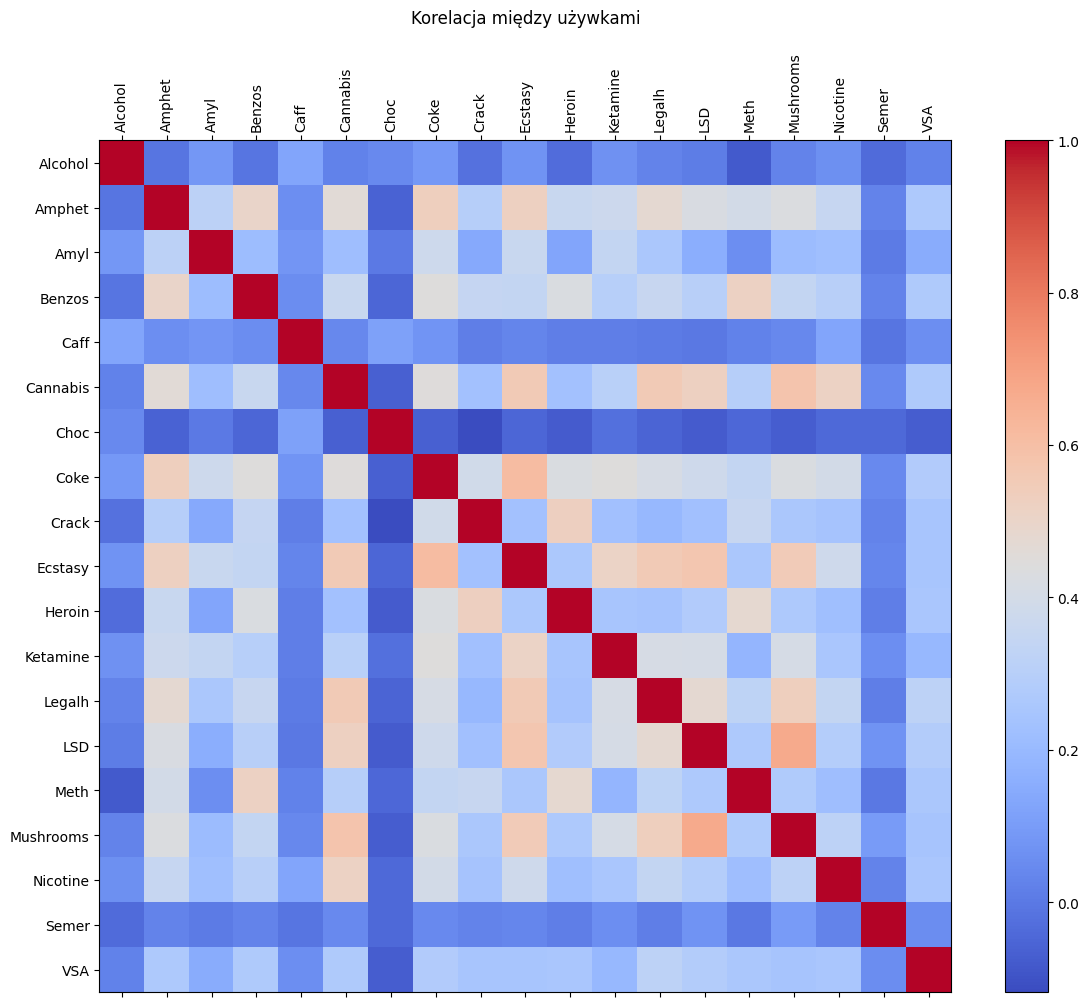

C:\Users\flisk\AppData\Local\Temp\ipykernel_70000\4162639718.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df[substance_cols].applymap(lambda x: 0 if x == 0 else 1)


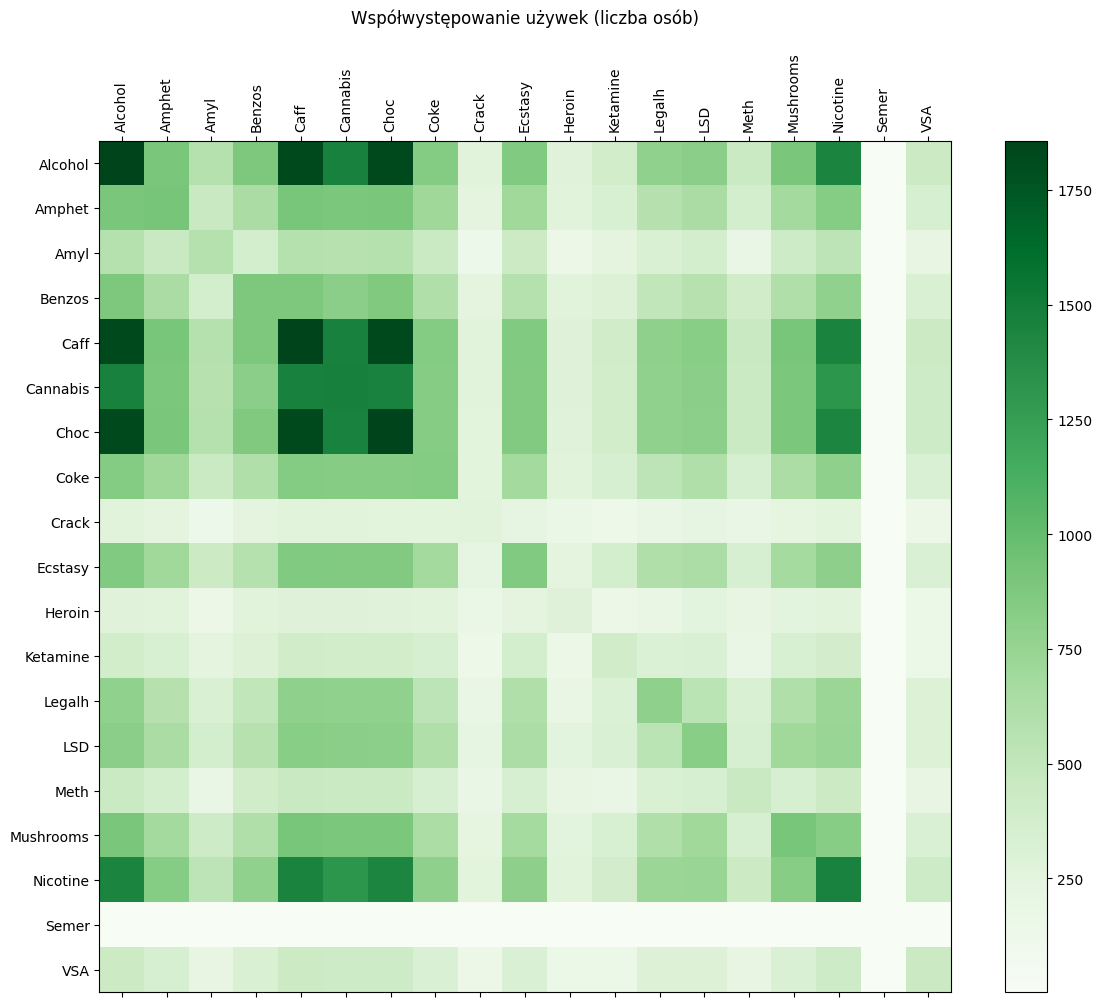

In [ ]:
corr = df[substance_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(substance_cols)), substance_cols, rotation=90)
plt.yticks(range(len(substance_cols)), substance_cols)
fig.colorbar(cax)
plt.title("Korelacja między używkami", pad=20)
plt.tight_layout()
plt.show()

df_binary = df[substance_cols].applymap(lambda x: 0 if x == 0 else 1)

# Macierz współwystępowania
co_occur = df_binary.T.dot(df_binary)

# Wizualizacja
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(co_occur, cmap='Greens')
plt.xticks(range(len(substance_cols)), substance_cols, rotation=90)
plt.yticks(range(len(substance_cols)), substance_cols)
fig.colorbar(cax)
plt.title("Współwystępowanie używek (liczba osób)", pad=20)
plt.tight_layout()
plt.show()

### Personality - preprocessing

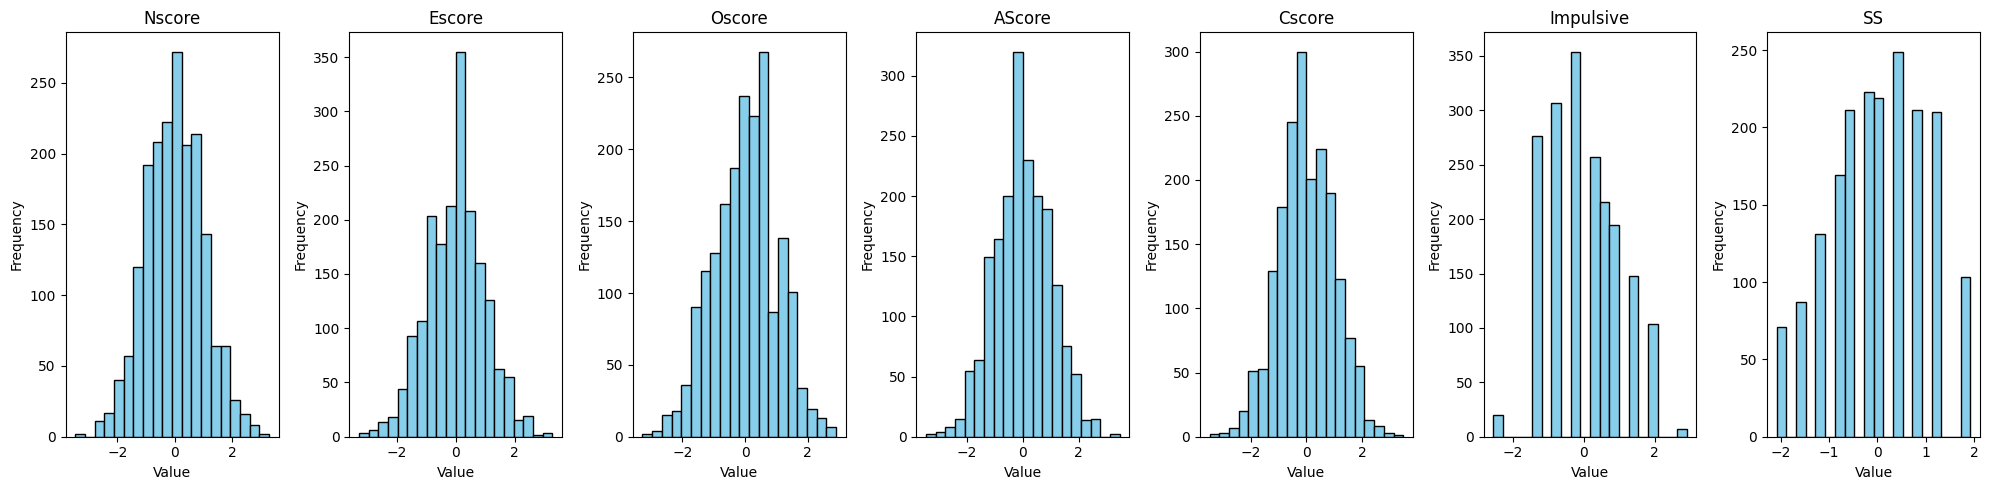

In [ ]:
columns = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']

fig, axes = plt.subplots(1, 7, figsize=(20, 5))

for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()